# Linear Regression Practice

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy, math
%matplotlib inline
#from lab_utils_multi import load_house_data

In [10]:
#load the dataset
X_train, y_train = load_data()

In [12]:
print(f"Type of X_train is: {type(X_train)}")
print(f"First 5 values are : {X_train[:5]}")

Type of X_train is: <class 'numpy.ndarray'>
First 5 values are : [6.1101 5.5277 8.5186 7.0032 5.8598]


In [13]:
#print y_train
print(f"Type of y_train is : {type(y_train)}")
print(f"First five values are : {y_train[:5]}")

Type of y_train is : <class 'numpy.ndarray'>
First five values are : [17.592   9.1302 13.662  11.854   6.8233]


In [16]:
#dimensions of data
print(f"Shape of X_train is : {X_train.shape}")
print(f"Shape of y_train is : {y_train.shape}")
print(f"Number of training examples 'm': {len(X_train)}")

Shape of X_train is : (97,)
Shape of y_train is : (97,)
Number of training examples 'm': 97


# Plotting the data

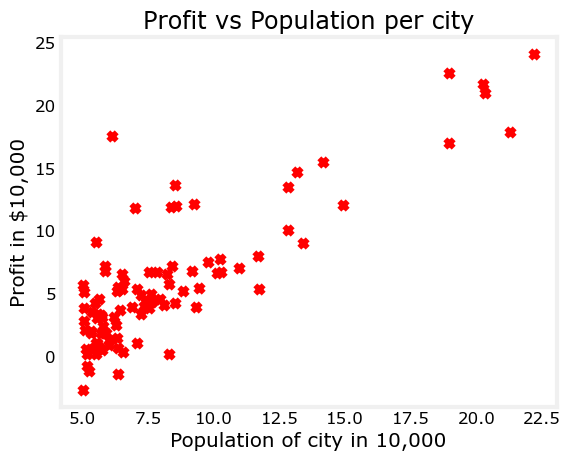

In [17]:
plt.scatter(X_train, y_train, marker = 'x', c = 'r')

#set title
plt.title('Profit vs Population per city')

#set y axis label
plt.ylabel("Profit in $10,000")

#set x axis label
plt.xlabel('Population of city in 10,000')
plt.show()

In [18]:
#compute the cost using gradient descent
#with the best values of w and b which should give the optimal answer

def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    
    total_cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost = (f_wb - y[i])**2
        total_cost += cost
        
    total_cost = total_cost / (2*m)
    
    return total_cost

In [24]:
#testing the compute cost method 
w_init = 2
b_init = 1

cost = compute_cost(X_train, y_train, w_init, b_init)

print(f"Type of cost is : {cost.dtype}, {type(cost)}")
print(f'Cost at initial w: {cost:.3f}')

#testing the function
from public_tests import *
compute_cost_test(compute_cost)

Type of cost is : float64, <class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


In [25]:
#calculate gradient descent method

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw += (f_wb - y[i])*x[i]
        dj_db += (f_wb - y[i])
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [27]:
 #compute gradient with w = b = 0
    
w_init = 0
b_init = 0

dj_dw, dj_db = compute_gradient(X_train, y_train, w_init, b_init)

print(f"Gradient descent at w = b = 0 is : {dj_dw, dj_db}")
compute_gradient_test(compute_gradient)

Gradient descent at w = b = 0 is : (-65.32884974555672, -5.83913505154639)
Using X with shape (4, 1)
All tests passed!


In [29]:
#learning parameters using batch gradient descent

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    
    J_history = []
    w_history = []
    b = b_in
    w = copy.deepcopy(w_in)
    
    for i in range(num_iters):
        
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        #save cost J at each iteration
        
        if i < 1000000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
            
    return w, b, J_history, w_history

In [32]:
#calculate w and b based on gradient_descent method

initial_w = 0
initial_b = 0

iterations = 1500
alpha = 1e-2

w,b,_,_ = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient,
                          alpha, iterations)

print(f"w and b found by gradient descent method is : {w}, {b} respectively")

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w and b found by gradient descent method is : 1.166362350335582, -3.63029143940436 respectively


In [34]:
#predictions
m = X_train.shape[0]

predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

Text(0, 0.5, 'Profits in $10,000')

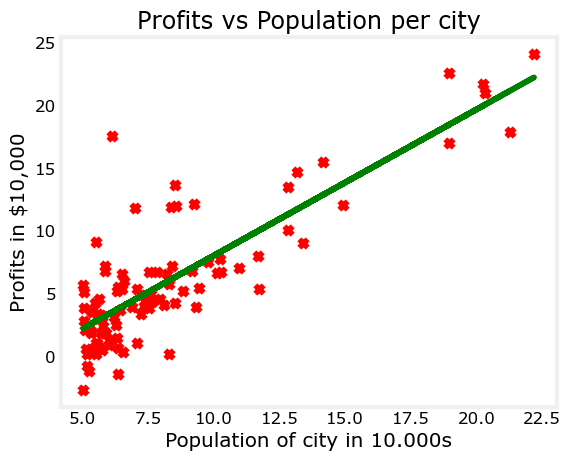

In [37]:
#plot the linear fit
plt.plot(X_train, predicted, c = 'g')

#scatter plot of the input data
plt.scatter(X_train, y_train, c = 'r', marker = 'x')

plt.title("Profits vs Population per city")

plt.xlabel("Population of city in 10.000s")
plt.ylabel("Profits in $10,000")

In [44]:
#predict the output

#here predict is an array
predicted.shape

#predict profit for 35,000 population

predict1 = 3.5*w + b
print(f"Profit for population = 35,000 is : ${predict1*10000}")

#prediction for profit 70,000
predict2 = 7*w + b
print(f"Profit for population = 70,000 is : ${predict2*10000}")


Profit for population = 35,000 is : $4519.7678677017675
Profit for population = 70,000 is : $45342.45012944714
